<a href="https://colab.research.google.com/github/Phatdeluxe/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [40]:
def prob_drunk_given_positive(prob_drunk_prior, prob_false_positive, prob_positive_drunk):
  return (prob_positive_drunk * prob_drunk_prior) / ((prob_positive_drunk * prob_drunk_prior) + (prob_false_positive * (1 - prob_drunk_prior)))

prob_drunk_given_positive(.001, 0.07907907907907907, 1)

0.0125

In [53]:
new_prior = .001
prob_false = 0.08
prob_pos = 1
bae = []
for _ in range(1, 10):
  bae.append(prob_drunk_given_positive(new_prior, prob_false, prob_pos))
  new_prior = prob_drunk_given_positive(new_prior, prob_false, prob_pos)
bae

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054,
 0.9967371577896734,
 0.9997381867081508,
 0.9999790498904363,
 0.9999983239589307,
 0.9999998659165077]

In [0]:
import scipy.stats as stats
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

In [0]:
df = df.replace({'?':np.NaN, 'n':0, 'y':1})

In [0]:
dem = df[df.party == "democrat"]

In [22]:
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
test = dem['budget'].dropna()
test

In [36]:
mean, var, std = stats.bayes_mvs(test)

mean, var, std

(Mean(statistic=0.8884615384615384, minmax=(0.8561717496397663, 0.9207513272833105)),
 Variance(statistic=0.10025441484585453, minmax=(0.08659518101086837, 0.11567741643163863)),
 Std_dev(statistic=0.3163219205956206, minmax=(0.2942705914814941, 0.34011382863923456)))

In [0]:
x = []

for i in range(1, 10):
  x.append(i)

In [0]:
test = []

for i in range(1, 10):
  test.append(1 - (.08 ** i))

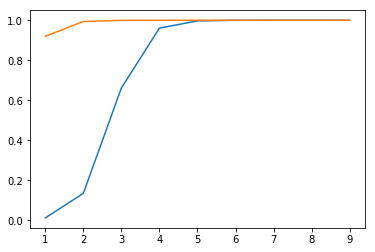

In [57]:
import seaborn as sns

sns.lineplot(x, bae)
sns.lineplot(x, test);

From what I have learned the main difference between bayesian and frequentist statistics is that bayesian takes into account prior knowledge, where frequentist just works with the main probablilty 

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)